In [2]:
import numpy as np
import pandas as pd
from deap import algorithms

from preprocessing import preprocess_data
from setup import setup_cmaes
from strategy_visualizer import print_strategy, plot_strategy, simulate_strategy, plot_fitness_over_generations

In [3]:
stock_data, ta_features, _ = preprocess_data("./data/wig_d.csv")
ta_features

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,...,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_cr
365,0.006009,0.094874,0.941641,0.800880,0.820727,0.901769,0.615958,0.136714,0.459783,0.341002,...,0.714163,0.847761,0.883304,0.550882,0.754635,0.800912,0.454282,0.095323,0.723399,0.217329
366,0.010085,0.067148,0.908381,0.790832,0.819671,0.900598,0.613798,0.138438,0.493822,0.341002,...,0.714442,0.843452,0.880940,0.545478,0.774311,0.824712,0.455591,0.095391,0.682926,0.216556
367,0.030662,0.093509,0.968945,0.836003,0.821472,0.900718,0.652594,0.140952,0.516197,0.369727,...,0.733597,0.845106,0.879435,0.552450,0.775482,0.844046,0.431166,0.095770,0.740789,0.231158
368,0.021698,0.128281,0.921666,0.831179,0.821483,0.899950,0.658175,0.144114,0.555109,0.369727,...,0.682954,0.845887,0.878413,0.556376,0.820520,0.870848,0.472013,0.096149,0.691829,0.232766
369,0.014627,0.103969,0.872146,0.805248,0.817366,0.900179,0.647337,0.146147,0.526596,0.360938,...,0.685832,0.843416,0.877019,0.553355,0.788863,0.884323,0.399113,0.096263,0.669190,0.228294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,0.976102,0.938315,0.783798,0.993424,0.871783,0.991989,0.811603,0.312019,0.649625,0.412539,...,0.921568,0.966601,0.937050,0.723119,0.714089,0.754736,0.447659,0.349639,0.825358,0.471939
2279,0.981290,0.923087,0.820142,0.955853,0.829428,0.982671,0.809756,0.323694,0.666461,0.410112,...,0.931230,0.984643,0.956861,0.725604,0.695299,0.767887,0.397341,0.371642,0.681307,0.470523
2280,0.981810,0.906549,0.779111,0.914818,0.819299,0.980124,0.802191,0.335261,0.582716,0.410112,...,0.931895,0.993649,0.974810,0.710479,0.690118,0.777104,0.375822,0.379975,0.668755,0.465184
2281,0.994691,0.928762,0.837785,0.910447,0.817958,0.979381,0.814606,0.347676,0.654219,0.410112,...,0.915056,1.000000,0.990651,0.693349,0.733067,0.795286,0.424862,0.388276,0.706705,0.471686


In [4]:
# CMAES algorithm parameters:
LAMBDA = 200
N_GENERATIONS = 3000

# Simulation parameters:
INITIAL_MONEY = 1000
# COMMISSION = 0.0001 # 0.01%
COMMISSION = 0

In [5]:
toolbox, stats, hall_of_fame = setup_cmaes(
    stock_data,
    ta_features,
    LAMBDA,
    INITIAL_MONEY,
    COMMISSION,
)

In [6]:
final_population, logbook = algorithms.eaGenerateUpdate(
    toolbox,
    ngen=N_GENERATIONS,
    stats=stats,
    halloffame=hall_of_fame,
    verbose=True,
)

gen	nevals	avg            	std           	min           	max            
0  	200   	[1074.70807421]	[200.98403662]	[599.50712535]	[1734.33878443]
1  	200   	[1134.00027961]	[213.87689319]	[565.97964471]	[1756.86942934]
2  	200   	[1156.41091148]	[239.16528303]	[662.58096346]	[1931.15545703]
3  	200   	[1225.53600688]	[270.30052929]	[558.92233283]	[2159.59359606]
4  	200   	[1294.16767965]	[269.26308104]	[755.05985432]	[2262.52768796]
5  	200   	[1300.49597169]	[320.3106587] 	[655.3210206] 	[2133.89298531]
6  	200   	[1346.26166803]	[297.94901322]	[787.42055721]	[2317.62867861]
7  	200   	[1321.03889628]	[290.86857012]	[647.89063221]	[2390.45724725]
8  	200   	[1291.86447694]	[267.39272761]	[667.77747409]	[2273.30244581]
9  	200   	[1333.07307721]	[284.06170707]	[688.03820548]	[2324.67636276]
10 	200   	[1385.82150159]	[299.58024708]	[760.9343127] 	[2294.73850809]
11 	200   	[1400.89367695]	[332.99082475]	[706.58608558]	[2467.65948503]
12 	200   	[1423.01493311]	[324.03090257]	[672.1035

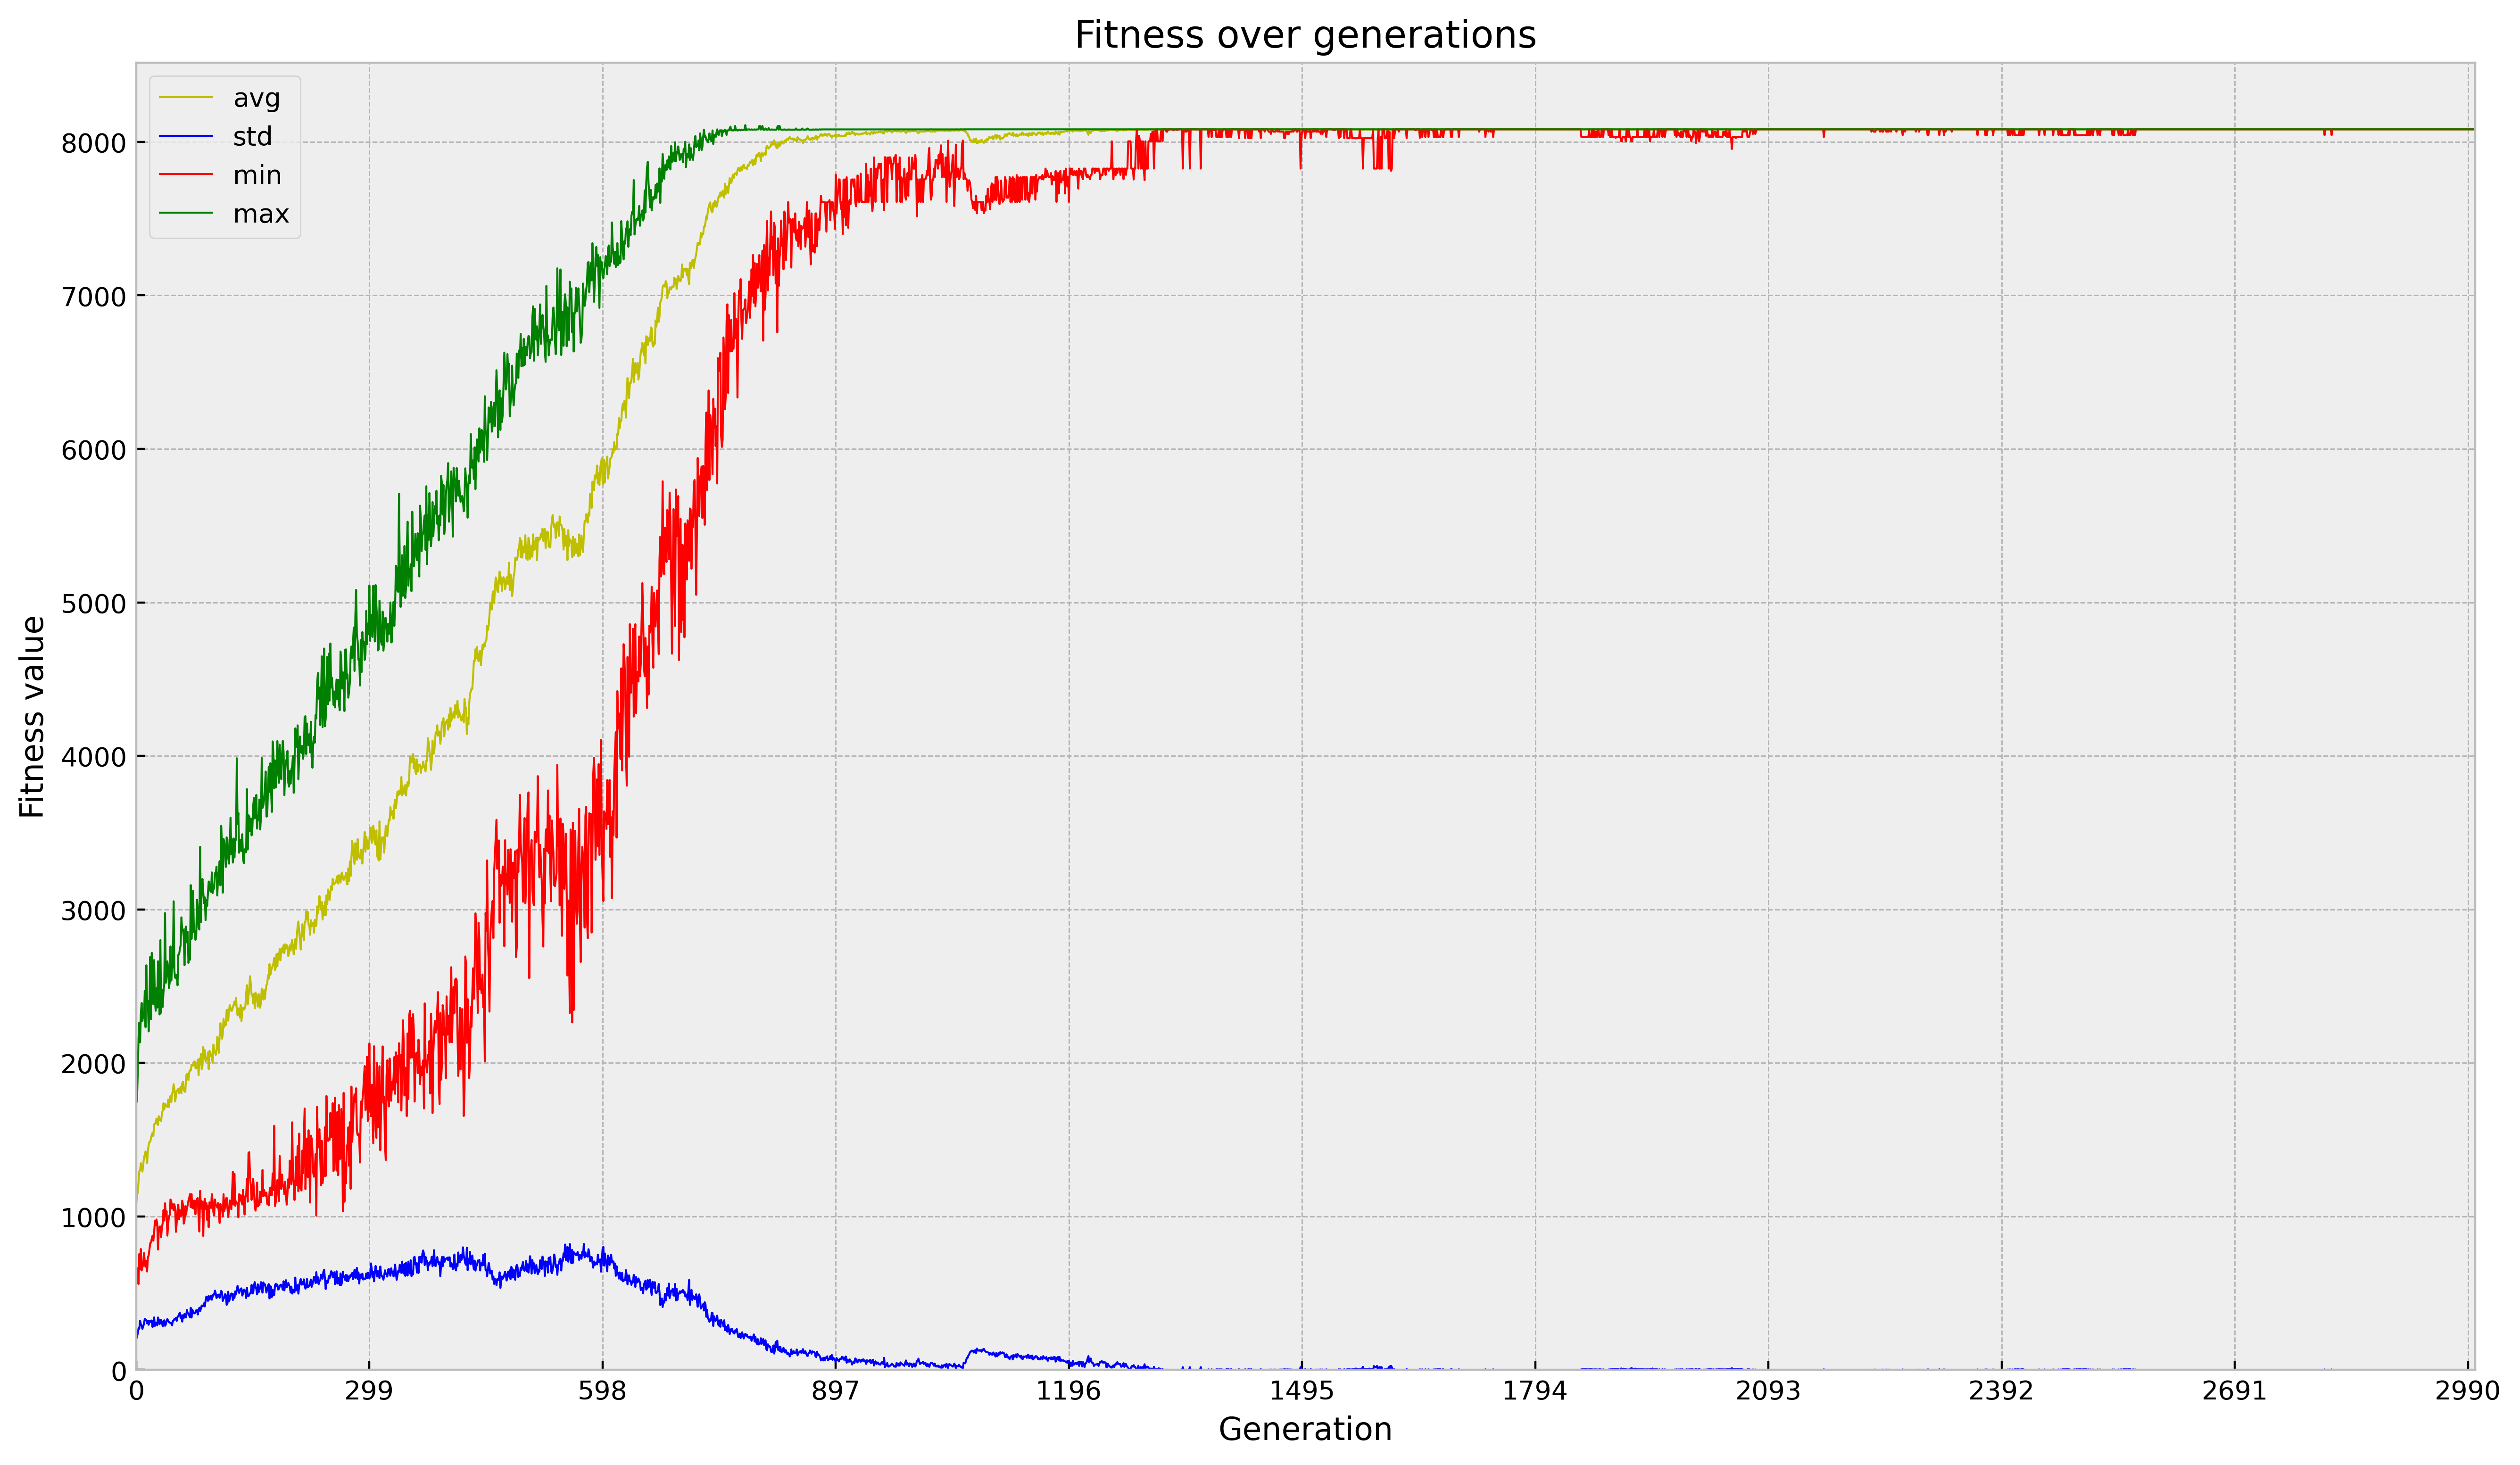

In [7]:
plot_fitness_over_generations(logbook)

In [8]:
best_strategy = hall_of_fame[0]
buy_strategy, sell_strategy = np.array_split(best_strategy, 2)
pd.DataFrame(
    zip(ta_features.columns, buy_strategy, sell_strategy),
    columns=["feature", "buy strategy weight", "sell strategy weight"],
)

,feature,buy strategy weight,sell strategy weight
0,volume_adi,-1.561040e+06,-7.232604e+06
1,volume_obv,-1.888622e+06,-1.629098e+07
2,volume_cmf,5.308949e+06,-3.033527e+07
3,volume_fi,1.716299e+07,2.551813e+07
4,volume_em,8.136740e+06,6.540237e+06
...,...,...,...
72,momentum_pvo_signal,1.354738e+07,-6.592320e+06
73,momentum_pvo_hist,-7.856619e+06,4.912057e+06
74,momentum_kama,-8.738411e+06,-1.165885e+06
75,others_dr,1.261559e+07,1.278301e+06


In [9]:
print_strategy(stock_data, ta_features, best_strategy, INITIAL_MONEY, COMMISSION)

      DATE:   2012-09-28        ACTION:          buy          OPEN:     43817.67         MONEY:            0        SHARES:  0.022821843
      DATE:   2012-10-02        ACTION:         sell          OPEN:      44144.2         MONEY:  1007.452016        SHARES:            0
      DATE:   2012-10-03        ACTION:          buy          OPEN:     44231.61         MONEY:            0        SHARES:  0.022776743
      DATE:   2012-11-08        ACTION:         sell          OPEN:     43275.15         MONEY:  985.6669728        SHARES:            0
      DATE:   2012-11-09        ACTION:          buy          OPEN:     43334.43         MONEY:            0        SHARES:  0.022745585
      DATE:   2012-11-15        ACTION:         sell          OPEN:     43725.47         MONEY:  994.5614064        SHARES:            0
      DATE:   2012-11-16        ACTION:          buy          OPEN:     43867.41         MONEY:            0        SHARES:  0.022671988
      DATE:   2012-11-19        ACTION:  

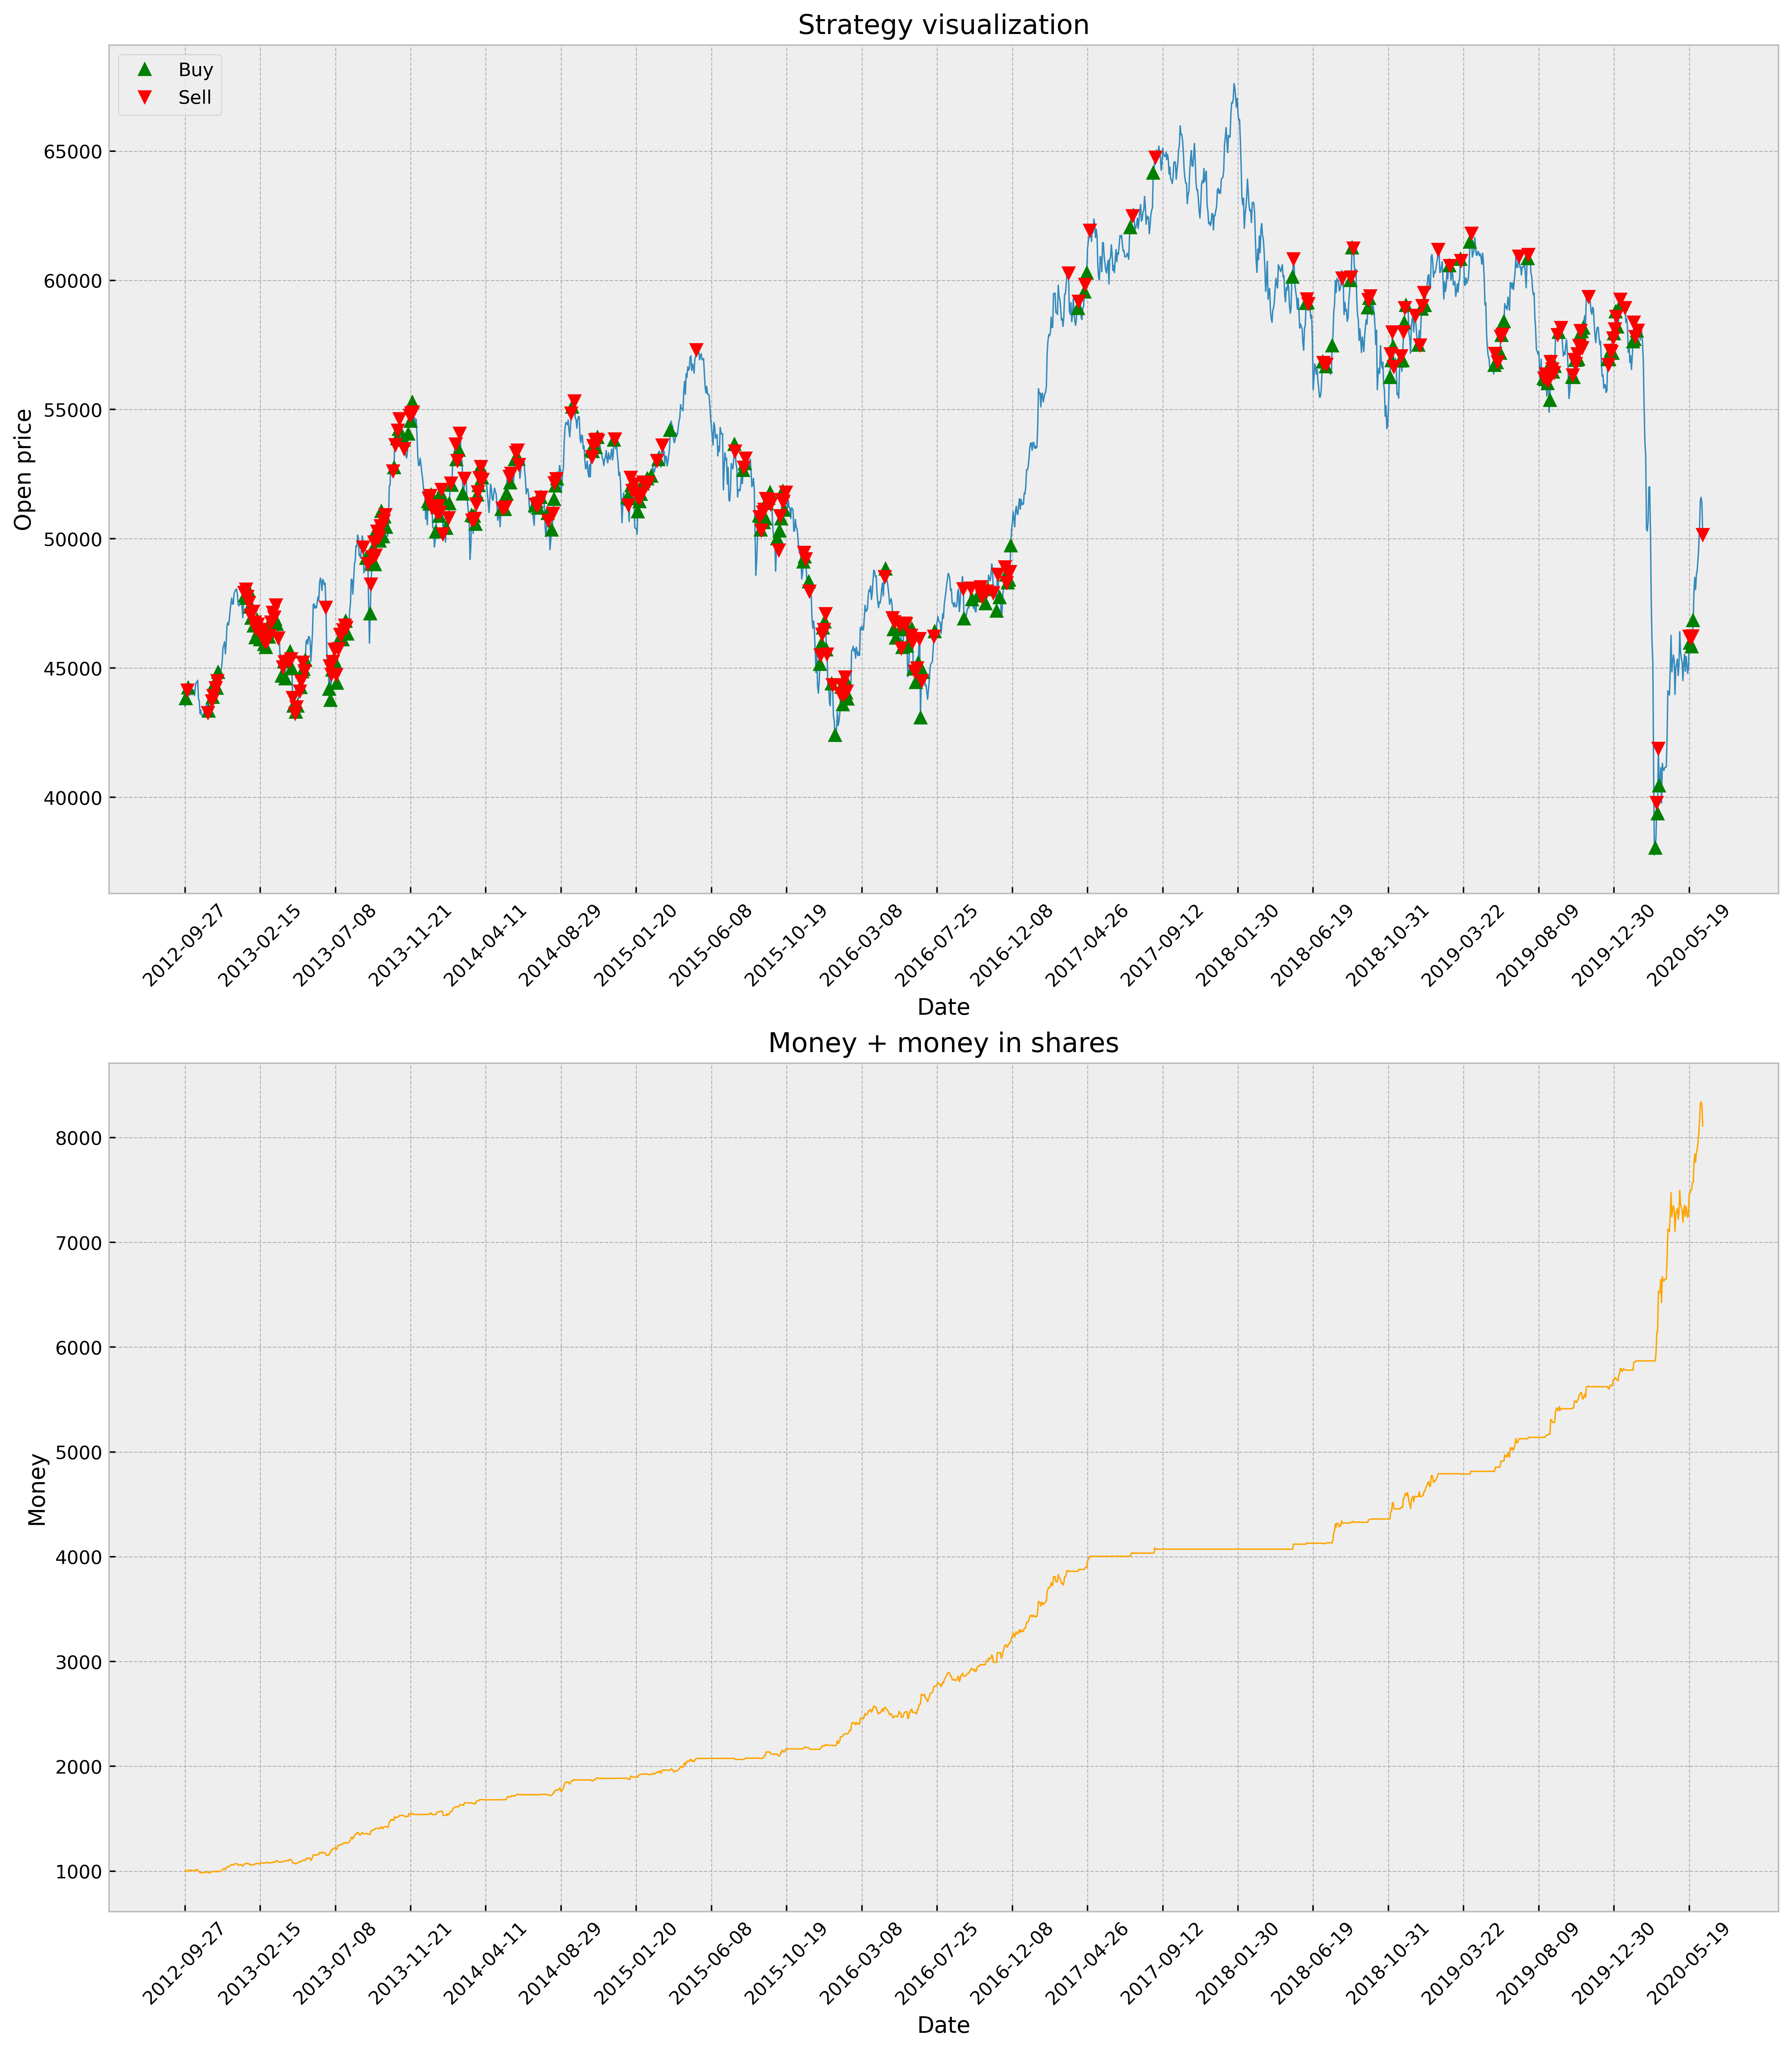

In [10]:
dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_strategy(
    stock_data,
    ta_features,
    best_strategy,
    INITIAL_MONEY,
    COMMISSION,
)
plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)